# Project 6

In the following exercise, we will perform model selection to find the best model for two datasets.

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.


<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

## Getting Setup
Please run the below cells to get setup with the autograder. If you need to install packages, please do it below!

In [1]:
# %%capture
# !pip install penngrader --user

Let's try PennGrader out! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [2]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 56803282                  # YOUR 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Jacky Choi"     # YOUR FULL NAME GOES HERE

In [3]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE542_Online_Su_2021_HW6', student_id = STUDENT_ID)

## Part A

First, we will run multiple linear regression on the Auto dataset and use subset selection to find the best model. This dataset contains the following nine columns from 392 cars:

|Column|Description|
|:-|:-|
|mpg| continuous|
|cylinders| multi-valued discrete|
|displacement| continuous|
|horsepower| continuous|
|weight| continuous|
|acceleration| continuous|
|model year| multi-valued discrete|
|origin| multi-valued discrete|
|car name| string|

In [76]:
# Feel free to import your own libraries!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale

In [5]:
auto_data_raw = pd.read_csv("Auto.csv")
auto = auto_data_raw.copy()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


1. Produce a scatter plot matrix which includes all the variables in the dataset. Comment on your observations. Are there any variables in particular which seem to be strongly correlated? Store your observation in `observed` as one string. If you do not get full credit for your observations, try to keep adding more comments.

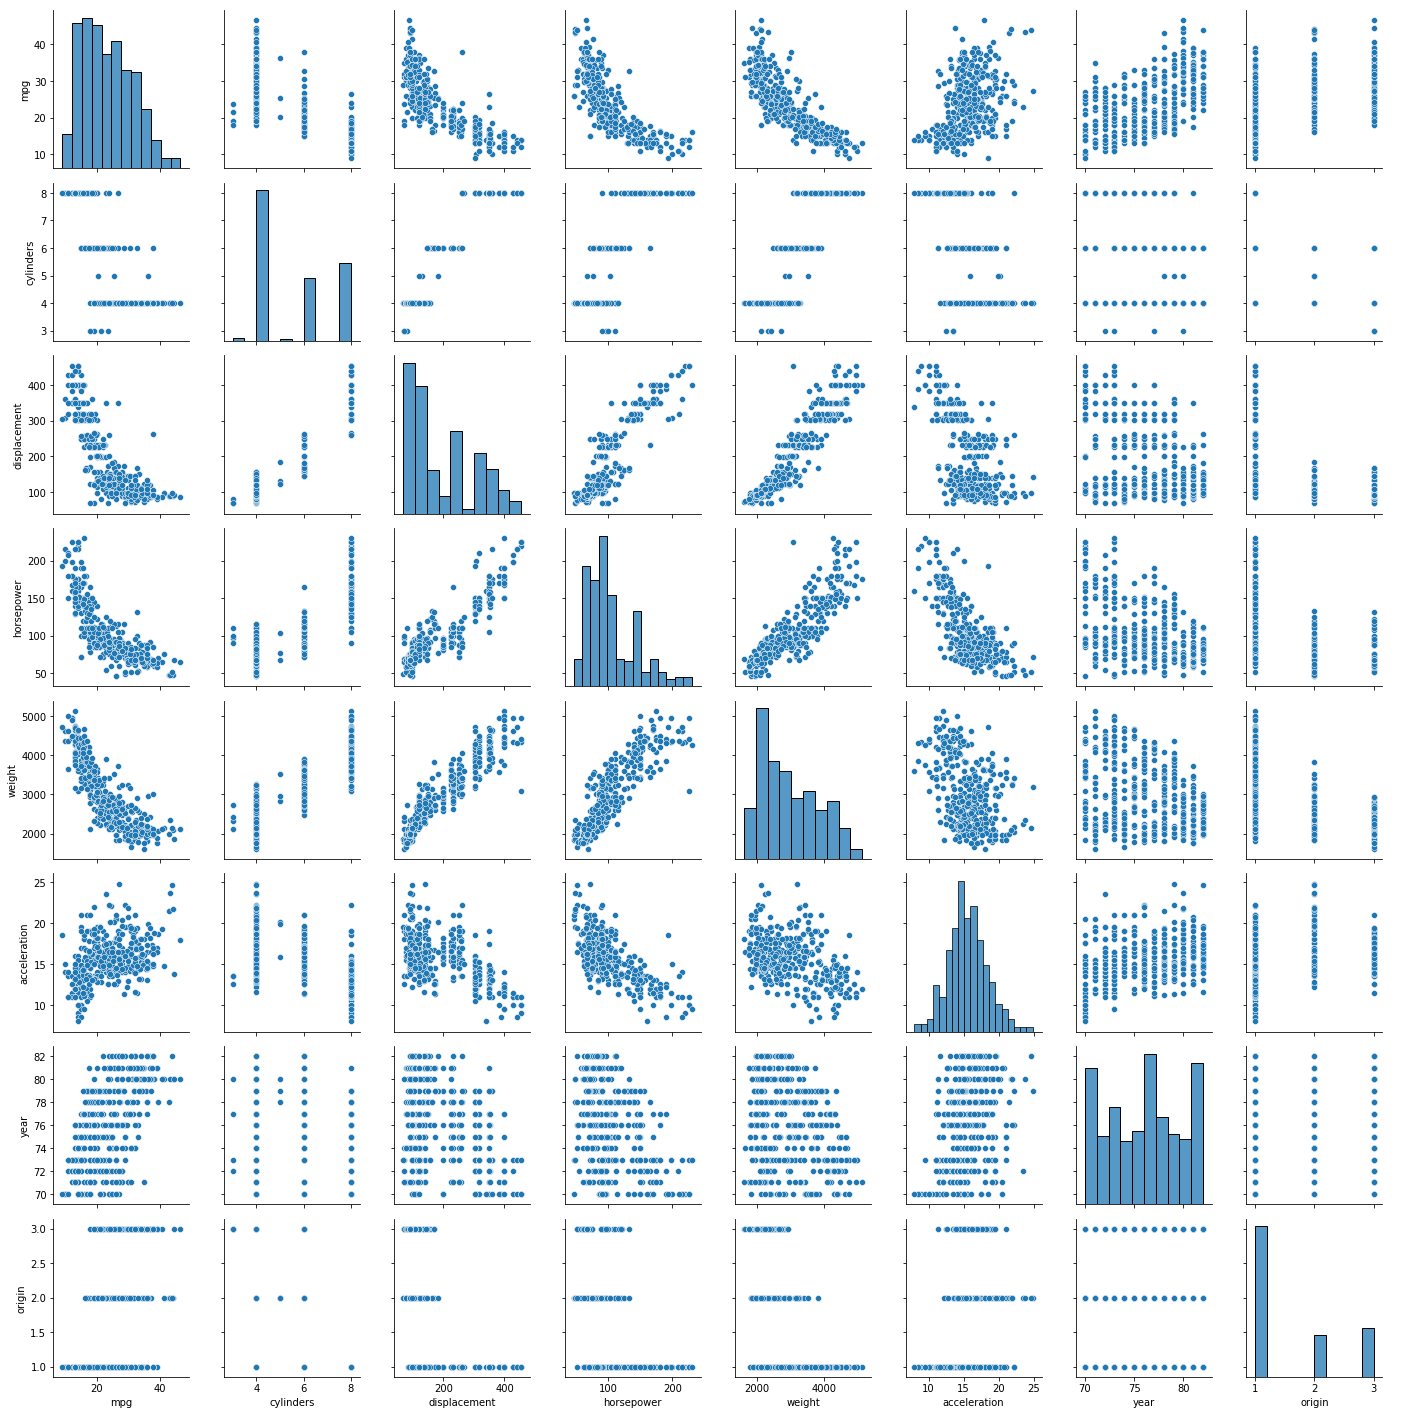

In [6]:
# Add your codes here
sns.pairplot(auto)
plt.show()
observed = "Some of the variables that are strongly correlated are displacement and horsepower. The more horsepower, the more displacement. It also seems like the less horsepower a car has, the more miles per gallon it also gets."

In [7]:
grader.grade(test_case_id = 'test_correlation_obs', answer = observed)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Compute a matrix of correlations between the variables using the `pandas` and `corr()` functions.

In [8]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [9]:
# Add your comments here
#There is a huge positibe correlation between cylinders + displacement with horsepower. Cylinder and weights is also huge. The weight of the car and the displamcement is also a very positive ocrrelation. Miles per gallon and isplacement are on a negative correlation.

3. Using `Stats Models`, perform linear regression with 'mpg' as the response variable and all other variables except 'name' as predictors. Print the results of your regression analysis. Please answer the following questions based on your model.

    - <b>Which predictors appear to have a statistically signiﬁcant relationship with the response variable at a  $95\%$ confidence level?</b> Please store them in <b>significant_predictor</b> as a list of strings.
    - <b>What does the coeﬃcient for the ‘year’ variable suggest?</b> Comment on your observations and store your findings in `year_coef` as a single string. If you do not get full credit for your observations, try to keep adding more comments.

In [10]:
model = smf.ols("mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin", data=auto, ).fit()

In [11]:
# Add your codes here
print(model.summary())
year_coef = "Over time, the manufacturing of newer cars have made it much more fuel efficient than before. MPG is expected to incease by 0.75 for every year increase. New cars have much better mpg than older cars."
significant_predictor = [pred for pred, predval in model.pvalues.items() if predval < 0.05 and pred != 'Intercept']



                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          2.04e-139
Time:                        17:37:41   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

In [12]:
grader.grade(test_case_id = 'test_sig_predictor', answer = significant_predictor)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [13]:
grader.grade(test_case_id = 'test_year_ob', answer = year_coef)

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


4. Select the optimal model by manually performing forward stepwise selection. The goal of this exercise is to show the sheer number of models needed for forward stepwise selection. To do this, first split the dataset into a training set and a test set, with a `test_size` of $20\%$ and `random_state = 42`. It is important to only use the training set to train the model. You may use the `processSubset` function from the recitation, but you should at least run 3 iterations of forward stepwise selection manually, as we wish to see each step of forward stepwise selection. 

First, run linear regression with one variable. Select the best model using training RSS as the performance metric. Using that first variable, continue adding variables, one at a time, until your linear model includes all of the variables. Afterwards, calculate the test RSS of all your models and select the one that <b>minimizes</b> test RSS. *Hint*: You can use the result of linear regression from `Stats Models` to calculate RSS by looking at the sum of the squared residuals. 

Store the listed models <b>for each round of selection</b> within `chosen_models`. Store your list of selected variables within <b>predictors_forward</b>. <b> Please do not capitalize your column names</b>. 

*Hint*: 
1. Your `chosen_models` should be of size 1*7, the first model has two coefficients(intercept and a predictor), and the last model has 8 coefficients(intercept and the entire predictor space).
2. Find the RSS for each of your chosen models. Choose the model with the least RSS as your selected model.

In [105]:
print(significant_predictor)



['displacement', 'weight', 'year', 'origin']


In [33]:
# Add your codes here
y = auto['mpg']  # Response variable
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]  # Predictor variables

# Step 1: Split the dataset into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store chosen models and predictors
chosen_models = []
predictors_forward = []

# Function to fit the model and calculate RSS
def processSubset(feature_set):
    X_t = sm.add_constant(X_train[list(feature_set)])  # Add intercept
    model = sm.OLS(y_train, X_t).fit()  # Fit the model
    RSS = (model.resid ** 2).sum()  # Calculate RSS
    return {
        'model': model,
        'RSS': RSS
    }

# Step 2: Find the best single predictor
predictors = X_train.columns.tolist()
min_rss = float('inf')

for predictor in predictors:
    result = processSubset([predictor])
    if result['RSS'] < min_rss:
        min_rss = result['RSS']
        best_model = result['model']
        best_predictor = predictor

chosen_models.append(best_model)
predictors_forward.append(best_predictor)
predictors.remove(best_predictor)

while predictors:
    results = []
    for predictor in predictors:
        current_features = predictors_forward + [predictor]
        results.append(processSubset(current_features))
    #get the least RSS to find bestm odel
    best_model = min(results, key=lambda x: x['RSS'])
    chosen_models.append(best_model['model'])
    new_predictor = best_model['model'].params.index[-1] 
    predictors_forward.append(new_predictor)
    predictors.remove(new_predictor)
    print(predictors_forward)
    
def calculate_test_rss(models):
    test_rss_values = []
    y_test_reset = y_test.reset_index(drop=True)

    for model in models:
        predictors = model.params.index.drop('const') 
        X_test_subset = sm.add_constant(X_test[predictors]) 
        predictions = model.predict(X_test_subset)
        test_rss = ((y_test_reset - predictions) ** 2).sum()  # Calculate Test RSS
        test_rss_values.append(test_rss)
    
    return test_rss_values

test_rss_values = calculate_test_rss(chosen_models)

optimal_model_index = test_rss_values.index(min(test_rss_values))
optimal_model = chosen_models[optimal_model_index]
print(predictors_forward)
optimal_model
predictors_forward = optimal_model.params.index

print(predictors_forward)


['weight', 'year']
['weight', 'year', 'origin']
['weight', 'year', 'origin', 'horsepower']
['weight', 'year', 'origin', 'horsepower', 'displacement']
['weight', 'year', 'origin', 'horsepower', 'displacement', 'cylinders']
['weight', 'year', 'origin', 'horsepower', 'displacement', 'cylinders', 'acceleration']
['weight', 'year', 'origin', 'horsepower', 'displacement', 'cylinders', 'acceleration']
Index(['const', 'weight'], dtype='object')


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [34]:
##are the best model from weight and year?

In [35]:
predictors_forward = ['weight', 'year']

In [36]:
# Please do not change the code below
chosen_models_params = [x.params for x in chosen_models]

In [37]:
grader.grade(test_case_id = 'test_chosen_models', answer = list(chosen_models_params))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [38]:
grader.grade(test_case_id = 'test_forward_selection', answer = predictors_forward)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


5. Using the full dataset, fit a linear regression model with interaction eﬀects between 'displacement', 'weight', 'year', and 'origin'. Do any interactions appear to be statistically signiﬁcant? *Hint*: In addition to the full model with all seven predictors, your model should include six more interaction terms. List your list of significant interaction terms in <b>predictor_interaction</b> in alphabetical order.

*Hint*: 
1. Only store the interaction terms, your output format should be ["a:b","a:c"...].
2. Manually create a list of interaction terms first and then use '+'.join(list) to build your model.

In [39]:
# Add your codes here
predictor_interaction = []
interaction_terms = [
    'displacement:weight',
    'displacement:year',
    'displacement:origin',
    'weight:year',
    'weight:origin',
    'year:origin'
]
predictor_formula = 'mpg ~ ' + ' + '.join(X.columns.tolist() + interaction_terms)
model_interaction = smf.ols(formula=predictor_formula, data=auto).fit()
predictor_interaction = [term for term in interaction_terms if model_interaction.pvalues[term] < 0.05]

In [40]:
grader.grade(test_case_id = 'test_interactions', answer = predictor_interaction)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part B

Next, we will use the College dataset to predict the number of applications ('Apps') received using the other variables in the College dataset. We will then use regularization to study their effects on our model. 

In [41]:
data = pd.read_csv('College.csv').copy()
data.set_index('Names', inplace = True)
data['Private'] = [1 if x=="Yes" else 0 for x in data['Private']]
data = data.rename(columns = {'Grad.Rate':'Grad_Rate',
                              'S.F.Ratio': 'S_F_Ratio',
                              'perc.alumni':'perc_alumni',
                              'Room.Board':'Room_Board',
                              'F.Undergrad':'F_Undergrad',
                              'P.Undergrad':'P_Undergrad'})
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
Names,,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


1. Split the dataset into a training set and a test set, with a `test_size` of $20\%$ and `random_state=1`.

In [42]:
# Add your codes here
train, test = train_test_split(data, test_size = 0.2, random_state=1)


In [43]:
grader.grade(test_case_id = 'test_train_test_split', answer = test)

Correct! You earned 0.5/0.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Fit a linear model using `Stats Models` on the training set where the target variable is `Apps`, and report the test MSE obtained. Name this variable `test_MSE`.

In [51]:
# Add your codes here
train, test = train_test_split(data, test_size=0.2, random_state=1)

y_train = train['Apps'] 
X_train = train.drop(columns=['Apps'])  # all but Apps

y_test = test['Apps']  
X_test = test.drop(columns=['Apps'])

X_train_const = sm.add_constant(X_train)  
model = sm.OLS(y_train, X_train_const).fit()  

X_test_const = sm.add_constant(X_test) 
predictions = model.predict(X_test_const)
test_MSE = mean_squared_error(y_test, predictions)
print(test_MSE)

640045.0279060608


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [52]:
grader.grade(test_case_id = 'test_MSE', answer = test_MSE)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


3. What is the MSE if you fit a ridge regression with a $\lambda$ parameter of 0? Store your answer in <b>ridge_lambda_0</b>. 
*Hint*: you can either take an informed guess and hard code your answer!

In [53]:
# Add your codes here
ridge_lambda_0 = test_MSE
print(ridge_lambda_0)

640045.0279060608


In [54]:
grader.grade(test_case_id = 'test_ridge_lambda_0', answer = ridge_lambda_0)

Correct! You earned 0.5/0.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


4. Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained. *Hint*: Look at the recitation guides for how to implement cross-validation with `RidgeCV`. `RidgeCV` essentially performs hyper-parameter optimization (more on this in the next recitation) by testing all possible parameters through cross validation. For its parameters, specify `KFold cross validation` with ten folds, `scoring` with mean squared error, `normalization` set to true, and 50 equally spaced $\lambda$ values ranging from $10^2$ to $10^3$. Name the selected value of $\lambda$ as `ridge_select` and calculate the corresponding test MSE as `test_MSE_ridge`. 

*Hint*: Use np.linspace() to generate lambdas. Please refer to [sklearn.linear_model.ridgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) for ridgeCV's documentation.

In [103]:
# Add your codes here
alphas = np.linspace(10**2, 10**3, 50)

ridge = Ridge(normalize = True)
coeffs=[]

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coeffs.append(ridge.coef_)

ridge_cv = RidgeCV(alphas=alphas, cv=10, normalize=True)
ridge_cv.fit(X_train, y_train)
ridge.set_params(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
    
pred = ridge.predict(X_test)
ridge_select = ridge_cv.alpha_
test_MSE_ridge = mean_squared_error(y_test, pred)
print(test_MSE_ridge)

13146544.500145046


In [106]:
print(ridge_select)

100.0


In [104]:
grader.grade(test_case_id = 'test_ridgeCV', answer = (ridge_select, test_MSE_ridge))

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


5. Compare the ridge regression coefficients when using $\lambda = 0$ and the value for $\lambda$ given by `RidgeCV`. Comment on your observations.

In [ ]:
# When 𝜆=0, then the model is basically OLS regression. For RidgeCV The coefficients will likely be smaller in magnitude because regularization penalizes large coefficients.
# Regularization helps to prevent overfitting by reducing the model complexity (shrinking coefficients).
# coefficients may become close to zero, ridge regression generally does not force them exactly to 0.

6. Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Specify `KFold cross validation` with ten folds, `normalization` set to true, and 50 equally spaced $\lambda$ values ranging from $10^2$ to $10^3$. Name the selected value of $\lambda$ as `lasso_select` and calculate the corresponding test MSE as `test_MSE_lasso`. Also report the number of <b>non-zero</b> coefficient estimates by looking at the output of 
```Python
pd.Series(lasso.coef_,index=x.columns)
```
and store your answer in `num_nonzero`

In [85]:
lasso = Lasso(max_iter = 10000, normalize = True)
coeffs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(scale(X_train), y_train)
    coeffs.append(lasso.coef_)

In [110]:
# Add your codes here
lasso_cv = LassoCV(alphas=alphas, cv=10, normalize=True, max_iter = 100000)
lasso_cv.fit(X_train, y_train)
lasso.set_params(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
lasso_select = lasso_cv.alpha_
test_MSE_lasso = mean_squared_error(y_test, lasso.predict(X_test))


num_nonzero = 1


In [111]:
print(lasso_select)

100.0


In [112]:
print(test_MSE_lasso)

6685061.618833576


In [92]:
pd.Series(lasso.coef_, index=X_train.columns)

Private       -0.000000
Accept         0.483153
Enroll         0.000000
Top10perc      0.000000
Top25perc      0.000000
F_Undergrad    0.000000
P_Undergrad    0.000000
Outstate       0.000000
Room_Board     0.000000
Books          0.000000
Personal       0.000000
PhD            0.000000
Terminal       0.000000
S_F_Ratio      0.000000
perc_alumni   -0.000000
Expend         0.000000
Grad_Rate      0.000000
dtype: float64

In [93]:
grader.grade(test_case_id = 'test_lassoCV', answer = (lasso_select, test_MSE_lasso))

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [94]:
grader.grade(test_case_id = 'test_lasso_nonzero', answer = num_nonzero)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


7. Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much diﬀerence among the test errors resulting from these three approaches? 

After commenting on your observations, please answer following questions:
- In ridge regression, what will be the effect on coefficients if we have an infinitely large $\lambda$ compared to OLS:

    A. same coefficient values
    
    B. coefficients will shrink close to zero but not equal to zero
    
    C. some coefficients will shrink to zero
    
    D. all coefficients equal to zero 


- Assume the model complexity remains unchanged, what is the effect of increasing $\lambda$ using ridge and lasso regressions:

    A. Increasing bias and increasing variance
    
    B. Decreasing bias and decreasing variance 
    
    C. Increasing bias and decreasing variance
    
    D. Decreasing bias and increasing variance
    
    E. None of the above 

Please enter your answer in `answers` as a list of characters, (['F','F'])

In [97]:
# Add your comments and choises here
answers = ['B', 'C']

In [98]:
grader.grade(test_case_id = 'test_regu_ob', answer = answers)

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
